# Bibliotecas

In [1]:
# Data Manipulation
import pandas as pd
import json
import os
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
sns.set_palette("dark")
sns.set_style("whitegrid")

In [2]:
def correlation_matrix(correlation_matrix, ax = None, vmin = -1, vmax = 1):
    '''
    Description:
        - Plots a cool correlation matrix, based on seaborn heatmap
    Arguments:
        - Correlation Matrix Dataset (Ex: "df.corr()")
    '''
    
    # Creates a triangular shaped mask based on the original matrix
    tri_mask = np.triu(np.ones_like(correlation_matrix))

    # Plot the triangular heat map
    sns.heatmap(
        data = correlation_matrix,
        mask = tri_mask,
        annot = True,
        cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax = ax,
        vmin = vmin,
        vmax = vmax
    )

# Import dos dados e limpeza 

In [3]:
root_folder = '/home/gbrlmoraes/git_reps/VoiceToInsight/data/json_results'

dataframes = []
for file in os.listdir(root_folder):
    try:
        with open(os.path.join(root_folder, file), 'r', encoding = "utf8") as f:
            dfa = pd.json_normalize(json.load(f))
            dataframes.append(dfa)
    except Exception as e:
        print(f'erro no arquivo: {file}')
        print(e)

erro no arquivo: nps_2967631.json
Expecting property name enclosed in double quotes: line 13 column 9 (char 393)
erro no arquivo: nps_2964126.json
Expecting property name enclosed in double quotes: line 13 column 9 (char 387)
erro no arquivo: nps_2968253.json
Expecting property name enclosed in double quotes: line 13 column 5 (char 358)
erro no arquivo: nps_2963955.json
Expecting property name enclosed in double quotes: line 13 column 9 (char 382)
erro no arquivo: nps_2967703.json
Expecting property name enclosed in double quotes: line 13 column 9 (char 397)
erro no arquivo: nps_2968585.json
Expecting property name enclosed in double quotes: line 13 column 9 (char 417)
erro no arquivo: nps_2962972.json
Expecting property name enclosed in double quotes: line 13 column 5 (char 327)
erro no arquivo: nps_2968540.json
Expecting property name enclosed in double quotes: line 13 column 9 (char 397)
erro no arquivo: nps_2964360.json
Expecting property name enclosed in double quotes: line 13 col

In [4]:
df = pd.concat(dataframes)
df.head()

,empresa,atendimento,nps_atendimento,nps_suporte_tecnico,nps_comercial_financeiro,nps_recomendacao,nps_satisfacao,nps_custo,nps_unidade,nps_rh,nps_outros
0,Center Glass,Não,,,,,,,,,
0,TOCS,Sim,10,5,8,,10,3,8,,
0,Reciclar,Sim,10,9,10,10,5,10,10,,
0,Atlântico Hotels,Sim,6,6,8,7,,,6,,
0,PEP Hotel,Sim,,,,,,,,,


In [5]:
# Deixando os valores das colunas de NPS como numérico
for column in df.columns:
    if column not in ['empresa', 'atendimento']:
        df[column] = df[column].apply(lambda x: float(x.replace(',', '.').strip()) if x != '' else None)

In [6]:
df.head()

,empresa,atendimento,nps_atendimento,nps_suporte_tecnico,nps_comercial_financeiro,nps_recomendacao,nps_satisfacao,nps_custo,nps_unidade,nps_rh,nps_outros
0,Center Glass,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,TOCS,Sim,10.0,5.0,8.0,NaN,10.0,3.0,8.0,NaN,NaN
0,Reciclar,Sim,10.0,9.0,10.0,10.0,5.0,10.0,10.0,NaN,NaN
0,Atlântico Hotels,Sim,6.0,6.0,8.0,7.0,NaN,NaN,6.0,NaN,NaN
0,PEP Hotel,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Criando uma coluna de NPS geral
df['nps_geral'] = df[[coluna for coluna in df.columns if 'nps' in coluna]].mean(axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   empresa                   71 non-null     object 
 1   atendimento               71 non-null     object 
 2   nps_atendimento           43 non-null     float64
 3   nps_suporte_tecnico       39 non-null     float64
 4   nps_comercial_financeiro  32 non-null     float64
 5   nps_recomendacao          34 non-null     float64
 6   nps_satisfacao            27 non-null     float64
 7   nps_custo                 29 non-null     float64
 8   nps_unidade               32 non-null     float64
 9   nps_rh                    2 non-null      float64
 10  nps_outros                4 non-null      float64
 11  nps_geral                 47 non-null     float64
dtypes: float64(10), object(2)
memory usage: 7.2+ KB


In [9]:
df.reset_index(inplace = True, drop = True)

# Análise Exploratória

## Overall metrics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nps_atendimento,43.0,8.151163,2.536718,0.0,7.500000,9.000000,10.000000,10.0
nps_suporte_tecnico,39.0,7.461538,2.732323,0.0,6.250000,8.000000,9.250000,10.0
nps_comercial_financeiro,32.0,8.234375,2.369103,0.0,7.750000,9.000000,10.000000,10.0
nps_recomendacao,34.0,8.500000,2.489371,0.0,8.000000,9.500000,10.000000,10.0
nps_satisfacao,27.0,7.611111,2.870049,0.0,7.250000,8.000000,10.000000,10.0
nps_custo,29.0,7.068966,2.698294,0.0,7.000000,8.000000,9.000000,10.0
nps_unidade,32.0,8.375000,2.136473,0.0,7.750000,9.000000,10.000000,10.0
nps_rh,2.0,4.000000,5.656854,0.0,2.000000,4.000000,6.000000,8.0
nps_outros,4.0,5.500000,3.785939,0.0,4.500000,7.000000,8.000000,8.0
nps_geral,47.0,7.926596,2.021365,0.0,7.291667,8.428571,9.342857,10.0


<Figure size 1000x1000 with 0 Axes>

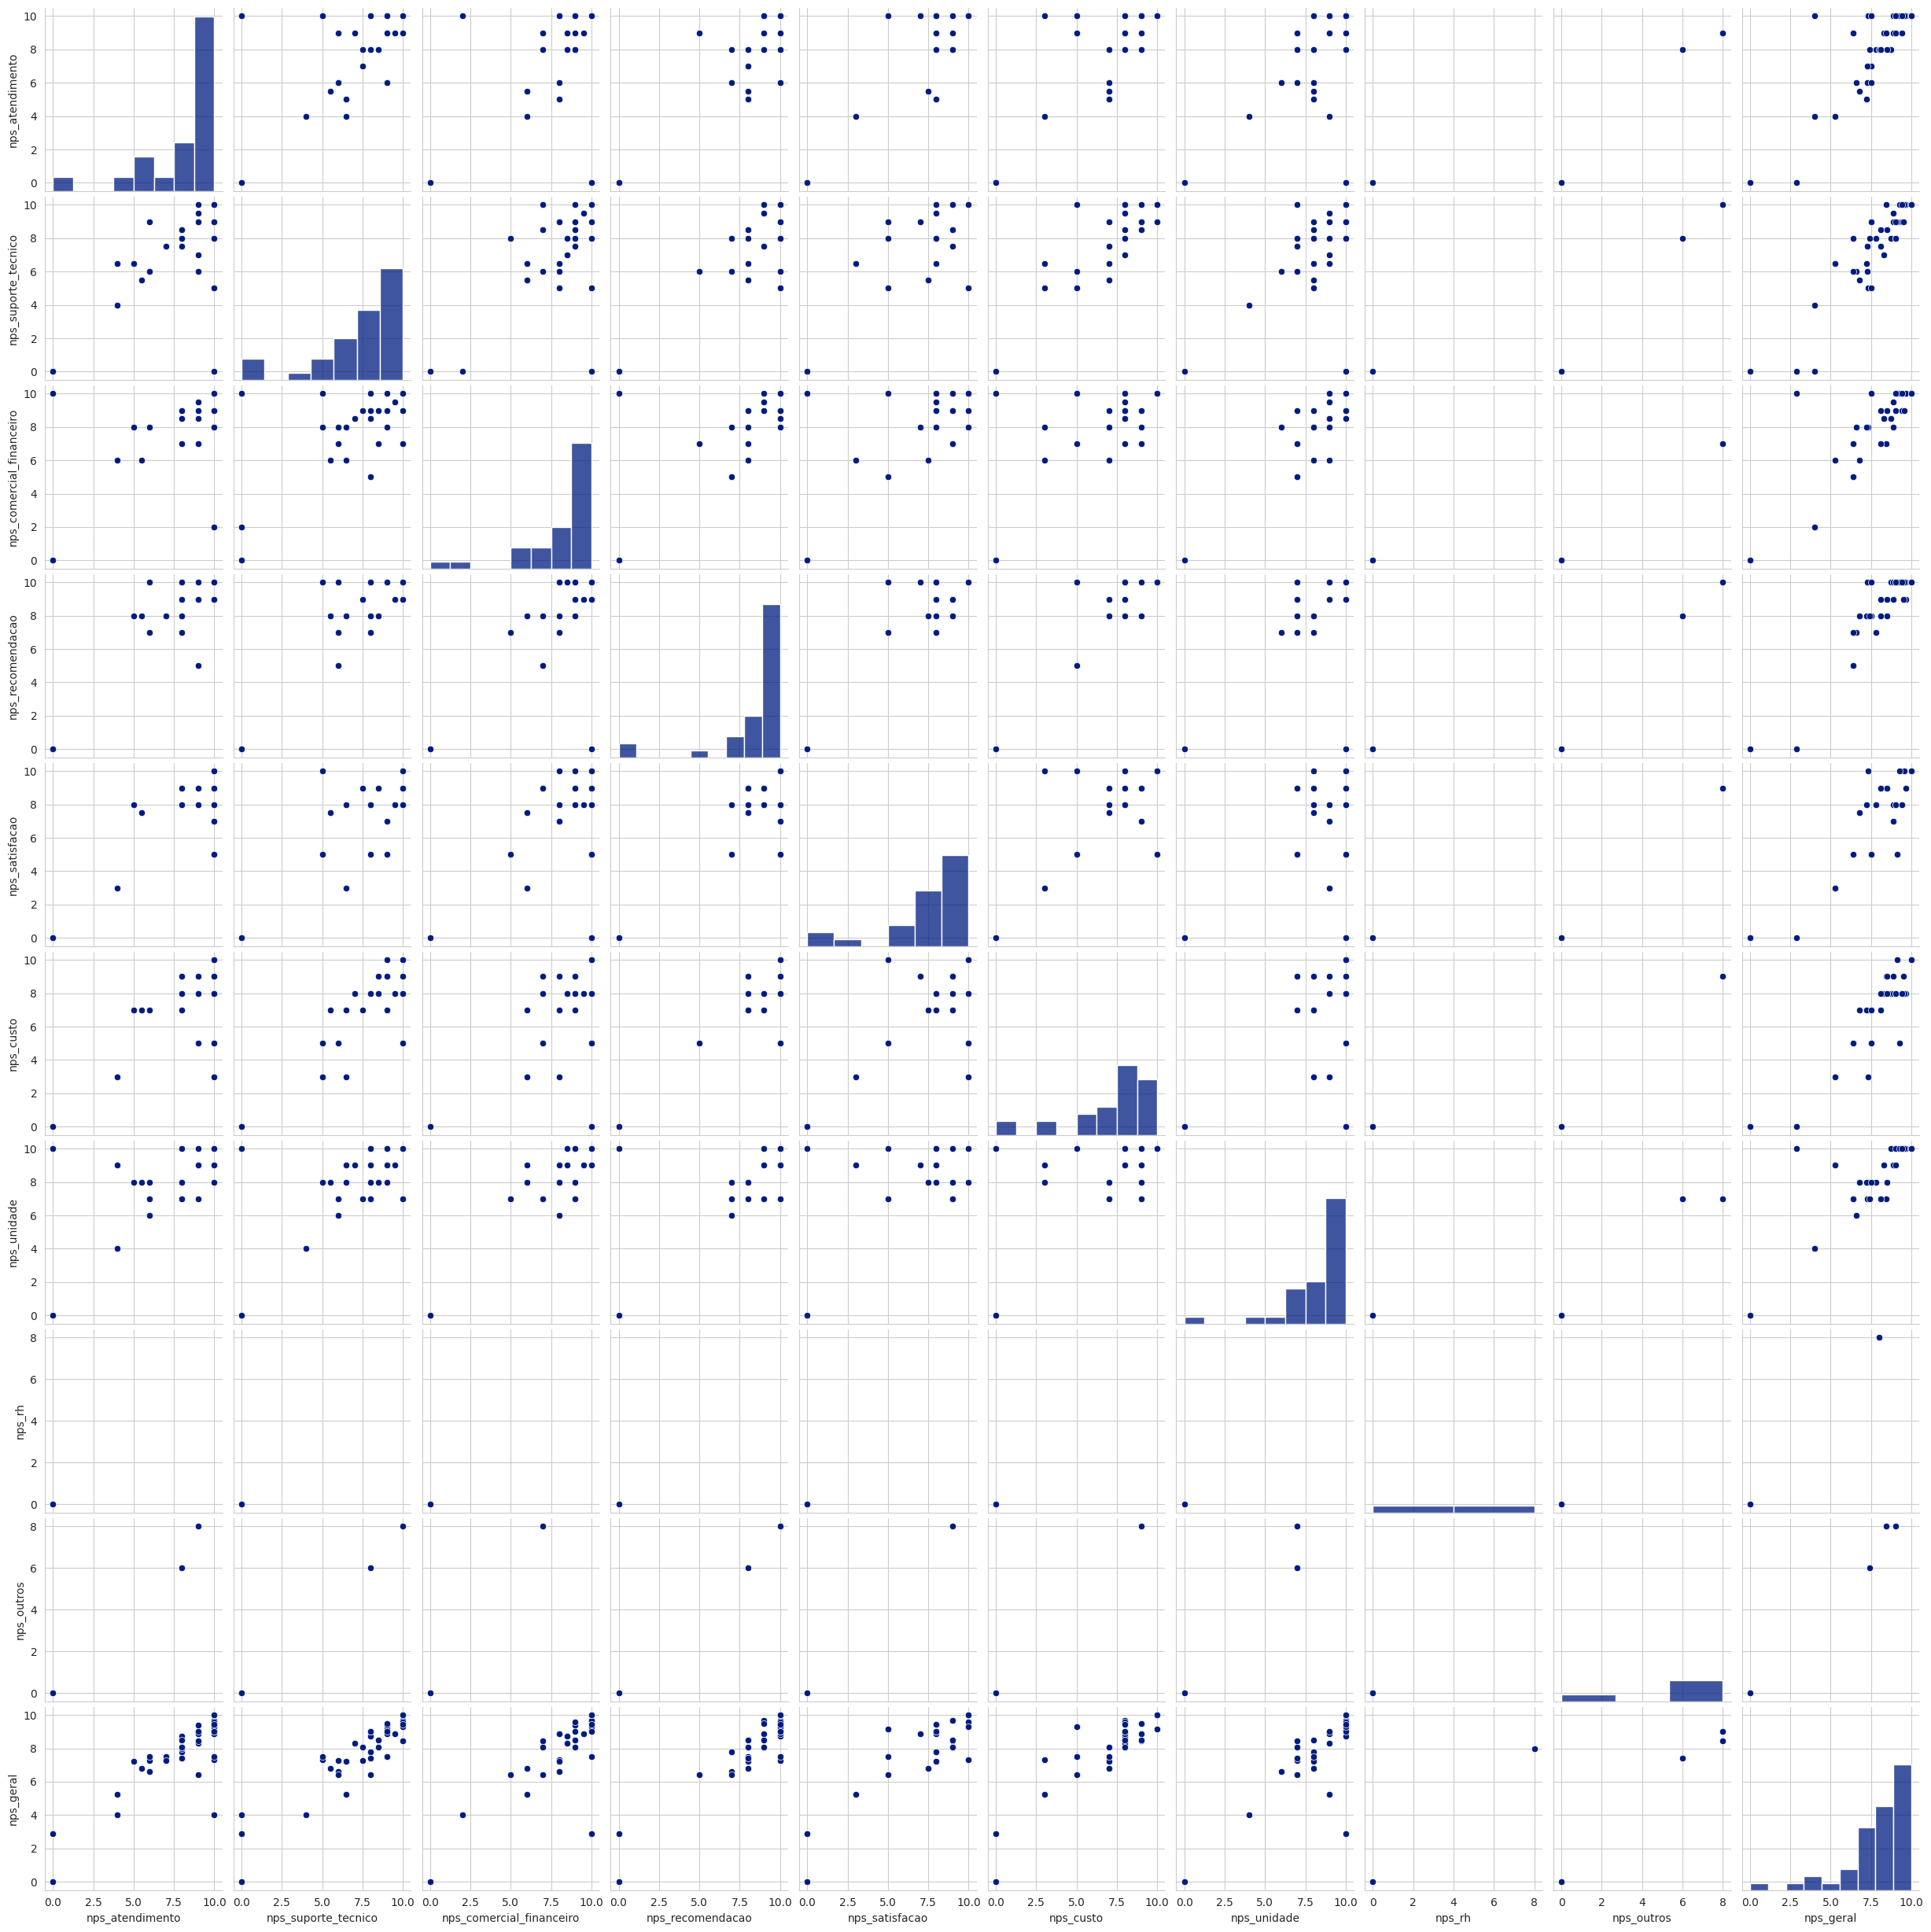

In [11]:
plt.figure(figsize = (10, 10))
sns.pairplot(
    df[[coluna for coluna in df.columns if 'nps' in coluna]]
)
plt.show()

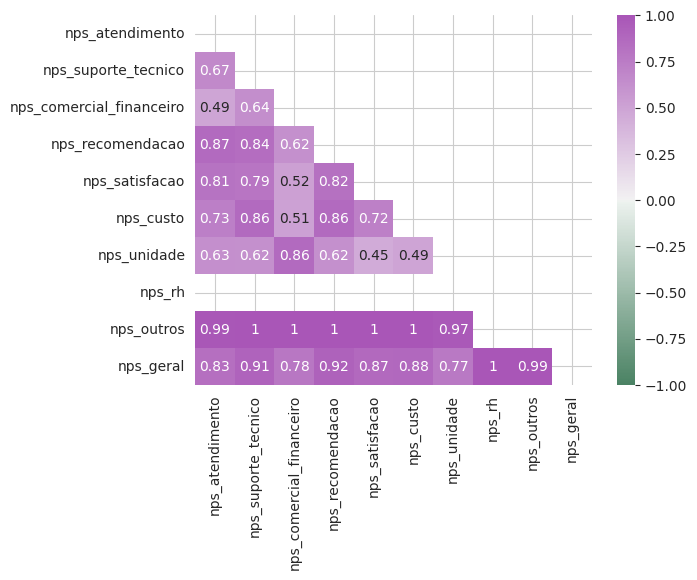

In [12]:
correlation_matrix(
    df[[coluna for coluna in df.columns if 'nps' in coluna]].corr()
)

## Metricas por empresa e atendimento

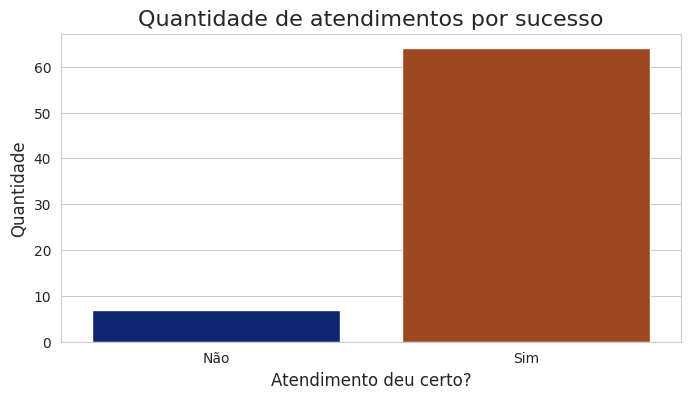

In [13]:
plt.figure(figsize = (8, 4))
sns.countplot(
    x = 'atendimento',
    hue = 'atendimento',
    data = df
)
plt.title('Quantidade de atendimentos por sucesso', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Atendimento deu certo?', fontsize = 12)
plt.show()

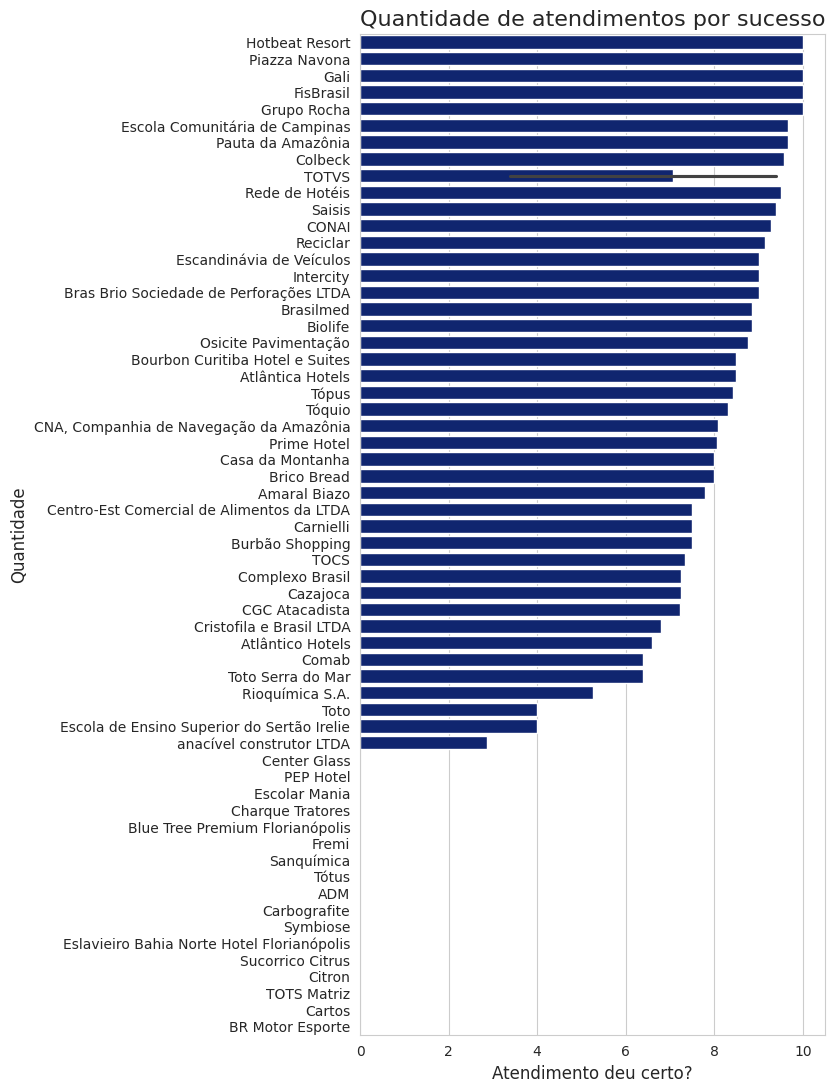

In [14]:
plt.figure(figsize = (6, 13))
sns.barplot(
    x = 'nps_geral',
    y = 'empresa',
    data = df.sort_values(by = 'nps_geral', ascending = False)
)
plt.title('Quantidade de atendimentos por sucesso', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Atendimento deu certo?', fontsize = 12)
plt.show()

## Detratores, Neutros e Promotores

In [15]:
df['status'] = pd.cut(
    x = df['nps_geral'],
    bins = [0, 6, 8, 10],
    labels = ['Detrator', 'Neutro', 'Promotor'],
    include_lowest = True
)
df.head()

,empresa,atendimento,nps_atendimento,nps_suporte_tecnico,nps_comercial_financeiro,nps_recomendacao,nps_satisfacao,nps_custo,nps_unidade,nps_rh,nps_outros,nps_geral,status
0,Center Glass,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TOCS,Sim,10.0,5.0,8.0,NaN,10.0,3.0,8.0,NaN,NaN,7.333333,Neutro
2,Reciclar,Sim,10.0,9.0,10.0,10.0,5.0,10.0,10.0,NaN,NaN,9.142857,Promotor
3,Atlântico Hotels,Sim,6.0,6.0,8.0,7.0,NaN,NaN,6.0,NaN,NaN,6.600000,Neutro
4,PEP Hotel,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.to_csv('/home/gbrlmoraes/git_reps/VoiceToInsight/data/nps_data.csv', index = False)

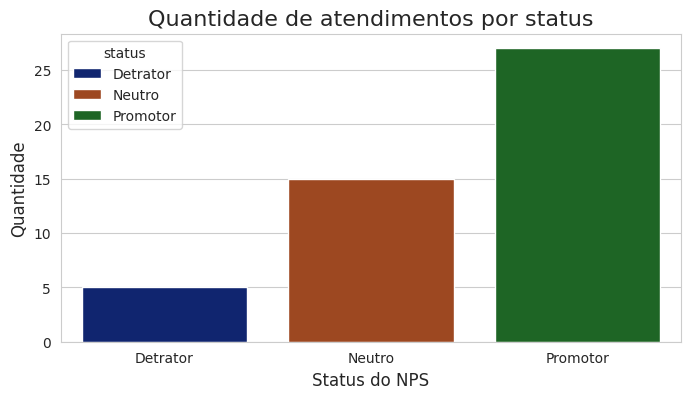

In [17]:
plt.figure(figsize = (8, 4))
sns.countplot(
    x = 'status',
    hue = 'status',
    data = df
)
plt.title('Quantidade de atendimentos por status', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Status do NPS', fontsize = 12)
plt.show()

In [18]:
pd.DataFrame(df['status'].value_counts()).reset_index()

,status,count
0,Promotor,27
1,Neutro,15
2,Detrator,5
